In [1]:
!pip install missingno

In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

1.Load,View Data

In [176]:
import pandas as pd

# Directory path
folder_path = r"C:\Users\riadh\Downloads\archive"

# Specific file names
file_names = [
    'Friday-WorkingHours-Afternoon-DDos.csv',
    'Friday-WorkingHours-Afternoon-PortScan.csv',
    'Friday-WorkingHours-Morning.csv',
    'Monday-WorkingHours.csv',
    'Thursday-WorkingHours-Afternoon-Infilteration.csv',
    'Thursday-WorkingHours-Morning-WebAttacks.csv',
    'Tuesday-WorkingHours.csv',
    'Wednesday-workingHours.csv'
]

# Load each file into separate variables
data1 = pd.read_csv(f"{folder_path}\\{file_names[0]}")
data2 = pd.read_csv(f"{folder_path}\\{file_names[1]}")
data3 = pd.read_csv(f"{folder_path}\\{file_names[2]}")
data4 = pd.read_csv(f"{folder_path}\\{file_names[3]}")
data5 = pd.read_csv(f"{folder_path}\\{file_names[4]}")
data6 = pd.read_csv(f"{folder_path}\\{file_names[5]}")
data7 = pd.read_csv(f"{folder_path}\\{file_names[6]}")
data8 = pd.read_csv(f"{folder_path}\\{file_names[7]}")

# Now data1, data2, ..., data8 contain the data from each file


In [179]:
data_list = [data1, data2, data3, data4, data5, data6, data7, data8]

print('Data dimensions: ')
for i, data in enumerate(data_list, start = 1):
  rows, cols = data.shape
  print(f'Data{i} -> {rows} rows, {cols} columns')

Data dimensions: 
Data1 -> 225745 rows, 79 columns
Data2 -> 286467 rows, 79 columns
Data3 -> 191033 rows, 79 columns
Data4 -> 529918 rows, 79 columns
Data5 -> 288602 rows, 79 columns
Data6 -> 170366 rows, 79 columns
Data7 -> 445909 rows, 79 columns
Data8 -> 692703 rows, 79 columns


In [180]:
dataf = pd.concat(data_list)
rows, cols = data.shape

print('New dimension:')
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

New dimension:
Number of rows: 692703
Number of columns: 79
Total cells: 54723537


In [184]:
# Deleting dataframes after concating to save memory
for d in data_list: del d

In [186]:
dataf.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [188]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max               

In [190]:
pd.options.display.max_rows = 80

print('Overview of Columns:')
data.describe().transpose()

Overview of Columns:


,count,mean,std,min,25%,50%,75%,max
Destination Port,692703.0,5.686869e+03,1.572742e+04,0.0,53.000000,80.000000,4.430000e+02,6.548700e+04
Flow Duration,692703.0,2.800168e+07,4.276680e+07,-1.0,201.000000,61437.000000,8.302437e+07,1.200000e+08
Total Fwd Packets,692703.0,9.556261e+00,7.471978e+02,1.0,2.000000,2.000000,7.000000e+00,2.039430e+05
Total Backward Packets,692703.0,1.021408e+01,9.842046e+02,0.0,1.000000,2.000000,6.000000e+00,2.723530e+05
Total Length of Fwd Packets,692703.0,5.550930e+02,6.163663e+03,0.0,12.000000,82.000000,3.650000e+02,1.224076e+06
Total Length of Bwd Packets,692703.0,1.699644e+04,2.241175e+06,0.0,0.000000,188.000000,1.159500e+04,6.270000e+08
Fwd Packet Length Max,692703.0,2.335939e+02,6.037519e+02,0.0,6.000000,46.000000,3.410000e+02,2.482000e+04
Fwd Packet Length Min,692703.0,1.502218e+01,5.106883e+01,0.0,0.000000,0.000000,3.200000e+01,2.065000e+03
Fwd Packet Length Mean,692703.0,6.055544e+01,1.576438e+02,0.0,6.000000,41.000000,5.666667e+01,4.640758e+03
Fwd Packet Length Std,692703.0,8.289586e+01,2.261261e+02,0.0,0.000000,0.000000,1.289169e+02,6.429191e+03


In [20]:
pd.options.display.max_columns = 80
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.000000,3,3,3,3.00000,0.00000,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.000000,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,1.100917e+05,18348.623850,109.0,0.000000,109,109,0,0.00000,0.00000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,2.307692e+05,38461.538460,52.0,0.000000,52,52,0,0.00000,0.00000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,3.529412e+05,58823.529410,34.0,0.000000,34,34,0,0.00000,0.00000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.000000,3,3,3,3.00000,0.00000,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.000000,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.0,0.00000,76,76,76.0,0.0,8.194940e+03,186.248642,6443.0,13617.579480,30780,3,30832,10277.33333,17755.84381,30780,4,3,3.0,0.0,3,3,0,0,0,0,80,64,124.165761,62.082881,28,76,41.714286,23.421602,548.571429,0,0,0,0,0,0,0,0,0,48.666667,28.0,76.0,80,0,0,0,0,0,0,4,112,2,152,-1,-1,3,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.0,0.00000,181,181,181.0,0.0,1.376543e+06,12345.679010,108.0,183.597386,320,2,2,2.00000,0.00000,2,2,2,2.0,0.0,2,2,0,0,0,0,40,40,6172.839506,6172.839506,42,181,97.600000,76.133435,5796.300000,0,0,0,0,0,0,0,0,1,122.000000,42.0,181.0,40,0,0,0,0,0,0,2,84,2,362,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.5,21.92031,6,6,6.0,0.0,4.512195e+05,36585.365850,41.0,52.325902,78,4,4,4.00000,0.00000,4,4,0,0.0,0.0,0,0,1,0,0,0,64,20,24390.243900,12195.121950,0,31,17.000000,16.3

#### 2.Data Cleaning

- The first step is to identify duplicate rows and missing or invalid values. We
identified and dropped the duplicate rows (308381 rows). From the data description, we identified that the dataset has infinity values. So, we checked and replaced the positive or negative infinity values with NaN (not a number) and counted it as a missing value. In the dataset, two features, FlowBytes/s, and Flow Packets/s contain missing values. For both columns, the number of missing values is 1564 which is 0.06% of total values.

- Flow Bytes/s and Flow Packets/s are continuous variables. We can see from the Flow Bytes/s and Flow Packets/s histogram and box plot that the majority of values are towards one area which indicates that the data is not normally distributed. The box plot of the Flow Bytes/s and Flow Packets/s shows that the variables have extreme values or outliers. So, our strategy is to fill in missing values with median value. Because, filling the missing values with the median does not introduce any new categories or disrupt the distribution of the data.

 #### Identifying duplicate values


In [192]:
dups = dataf[dataf.duplicated()]
print(f'Number of duplicates: {len(dups)}')


Number of duplicates: 308381


In [194]:
dataf.drop_duplicates(inplace = True)
dataf.shape

(2522362, 79)

#### Identifying missing values


In [208]:
missing_val = dataf.isna().sum()
print(missing_val.loc[missing_val > 0])

Flow Bytes/s    353
dtype: int64


In [210]:
# Checking for infinity values
numeric_cols = dataf.select_dtypes(include = np.number).columns
inf_count = np.isinf(dataf[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Flow Bytes/s       1211
 Flow Packets/s    1564
dtype: int64


In [212]:
# Replacing any infinite values (positive or negative) with NaN (not a number)
print(f'Initial missing values: {dataf.isna().sum().sum()}')

dataf.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {dataf.isna().sum().sum()}')

Initial missing values: 353
Missing values after processing infinite values: 3128


In [214]:
missing = dataf.isna().sum()
print(missing.loc[missing > 0])

Flow Bytes/s       1564
 Flow Packets/s    1564
dtype: int64


In [218]:
# Calculating missing value percentage in the dataset
mis_per = (missing / len(dataf)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

print(mis_table.loc[mis_per > 0])

                 Missing Values  Percentage of Total Values
Flow Bytes/s               1564                        0.06
 Flow Packets/s            1564                        0.06


#### Visualisation of missing data


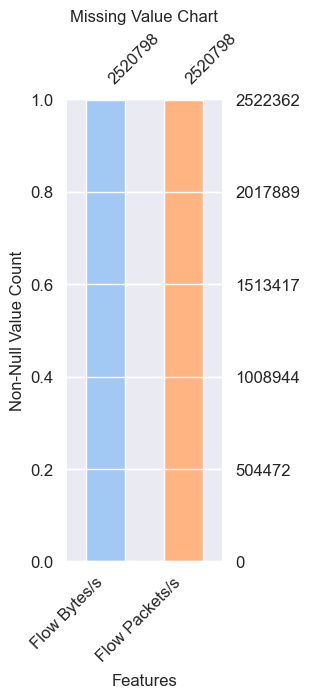

In [222]:
sns.set_palette('pastel')
colors = sns.color_palette()

missing_vals = [col for col in dataf.columns if dataf[col].isna().any()]

fig, ax = plt.subplots(figsize = (2, 6))
msno.bar(dataf[missing_vals], ax = ax, fontsize = 12, color = colors)
ax.set_xlabel('Features', fontsize = 12)
ax.set_ylabel('Non-Null Value Count', fontsize = 12)
ax.set_title('Missing Value Chart', fontsize = 12)
plt.show()

#### Dealing with missing values (Columns with missing data)

In [249]:
print(dataf.columns[dataf.columns.duplicated()])

Index([], dtype='object')


In [251]:
dataf = dataf.loc[:, ~dataf.columns.duplicated()]

In [253]:
dataf = dataf.reset_index(drop=True)


In [255]:
dups = dataf[dataf.duplicated()]
print(f'Number of duplicates: {len(dups)}')

Number of duplicates: 0


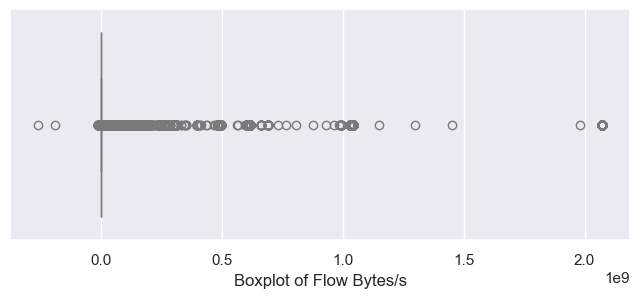

In [257]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = dataf['Flow Bytes/s'])
plt.xlabel('Boxplot of Flow Bytes/s')
plt.show()

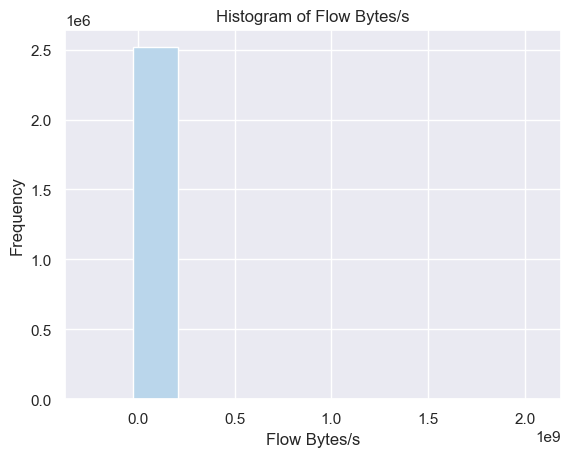

In [259]:
colors = sns.color_palette('Blues')
plt.hist(dataf['Flow Bytes/s'], color = colors[1])
plt.title('Histogram of Flow Bytes/s')
plt.xlabel('Flow Bytes/s')
plt.ylabel('Frequency')
plt.show()

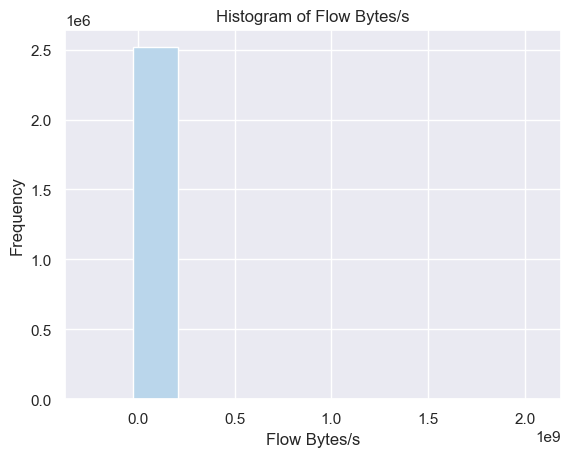

In [239]:
colors = sns.color_palette('Blues')
plt.hist(dataf['Flow Bytes/s'], color = colors[1])
plt.title('Histogram of Flow Bytes/s')
plt.xlabel('Flow Bytes/s')
plt.ylabel('Frequency')
plt.show()

In [269]:
# Remove any leading/trailing whitespace from column names
dataf.columns = dataf.columns.str.strip()

# Replace multiple spaces in column names with a single space
dataf.columns = dataf.columns.str.replace(r'\s+', ' ', regex=True)


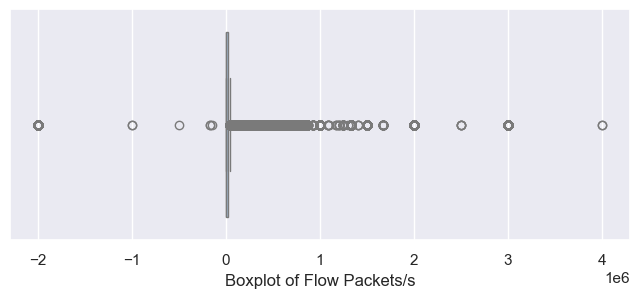

In [271]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=dataf['Flow Packets/s'])
plt.xlabel('Boxplot of Flow Packets/s')
plt.show()


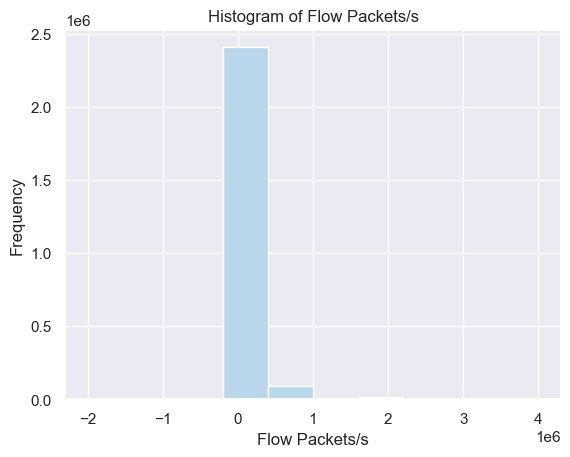

In [275]:
plt.hist(dataf['Flow Packets/s'], color = colors[1])
plt.title('Histogram of Flow Packets/s')
plt.xlabel('Flow Packets/s')
plt.ylabel('Frequency')
plt.show()

In [279]:
med_flow_bytes = dataf['Flow Bytes/s'].median()
med_flow_packets = dataf['Flow Packets/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)
print('Median of Flow Packets/s: ', med_flow_packets)

Median of Flow Bytes/s:  3715.0378579999997
Median of Flow Packets/s:  69.742244285


In [285]:
# Fill missing values by assigning back to the column directly
dataf['Flow Bytes/s'] = dataf['Flow Bytes/s'].fillna(med_flow_bytes)
dataf['Flow Packets/s'] = dataf['Flow Packets/s'].fillna(med_flow_packets)

In [289]:
print('Number of \'Flow Bytes/s\' missing values:', dataf['Flow Bytes/s'].isna().sum())
print('Number of \'Flow Packets/s\' missing values:', dataf['Flow Packets/s'].isna().sum())

Number of 'Flow Bytes/s' missing values: 0
Number of 'Flow Packets/s' missing values: 0


In [308]:
# Types of attacks & normal instances (BENIGN)
dataf['Label'].value_counts()

Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64